In [126]:
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime
import seaborn as sns

### To chech Actual Hours between 2019-01-01 00:00:00 and 2024-12-31 00:00:00

In [3]:
from datetime import datetime

# Define the start and end datetime
start_date = datetime(2019, 1, 1, 0, 0, 0)
end_date = datetime(2024, 12, 31, 0, 0, 0)

# Calculate the difference between the two dates
time_difference = end_date - start_date

# Get the total number of hours
total_hours = time_difference.total_seconds() / 3600

print(total_hours)


52584.0


In [4]:
# Read Weather Data
solar = pd.read_csv("final_solar_data.csv")
wind = pd.read_csv("final_wind_data.csv")
temp = pd.read_csv("final_temp_data.csv")
energy = pd.read_csv("cleaned_energy_data.csv")

In [5]:
solar.head(2)

,Unnamed: 0,MESS_DATUM,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT
0,0,2019-01-01 00:00:00,117.615385,0.0,0.0,0.0,151.612308
1,1,2019-01-01 01:00:00,118.153846,0.0,0.0,0.0,147.165385


In [6]:
wind.head(2)

,Unnamed: 0,MESS_DATUM,F,D
0,0,2019-01-01 00:00:00,4.466548,246.049822
1,1,2019-01-01 01:00:00,4.762278,246.725979


In [7]:
temp.head(2)

,Unnamed: 0,MESS_DATUM,TT_TU,RF_TU
0,0,2019-01-01 00:00:00,5.996371,93.598790
1,1,2019-01-01 01:00:00,5.946573,92.889113


In [10]:
energy.head(2)

,index,MESS_DATUM,grid load [MWh] Calculated resolutions,Grid load incl. hydro pumped storage [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions_x,Residual load [MWh] Calculated resolutions,Biomass [MWh] Calculated resolutions,Hydropower [MWh] Calculated resolutions,Wind offshore [MWh] Calculated resolutions,Wind onshore [MWh] Calculated resolutions,Photovoltaics [MWh] Calculated resolutions,Other renewable [MWh] Calculated resolutions,Lignite [MWh] Calculated resolutions,Hard coal [MWh] Calculated resolutions,Fossil gas [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions_y,Other conventional [MWh] Calculated resolutions,Germany/Luxembourg [€/MWh] Original resolutions
0,0,2019-01-01 00:00:00,43273.75,44546.75,1273.00,19825.50,4739.50,1554.25,3134.00,20314.25,0.0,134.75,6335.0,2811.75,3273.25,275.5,1724.25,28.32
1,1,2019-01-01 01:00:00,41631.25,43042.00,1410.75,16465.75,4737.25,1550.75,2868.25,22297.25,0.0,133.50,5379.5,2404.25,2967.25,62.5,1682.25,10.07


In [16]:

# Merge solar and energy data (assuming they share 'Start date' or a similar column)
merged_solar_energy = pd.merge(solar, energy, on='MESS_DATUM', how='inner')

# Merge the result with wind data
merged_wind_solar_energy = pd.merge(merged_solar_energy, wind, on='MESS_DATUM', how='inner')

# Finally, merge with the temperature data
final_merged_data = pd.merge(merged_wind_solar_energy, temp, on='MESS_DATUM', how='inner')


In [18]:
final_merged_data.columns

Index(['Unnamed: 0_x', 'MESS_DATUM', 'ATMO_LBERG', 'FD_LBERG', 'FG_LBERG',
       'SD_LBERG', 'ZENIT', 'index', 'grid load [MWh] Calculated resolutions',
       'Grid load incl. hydro pumped storage [MWh] Calculated resolutions',
       'Hydro pumped storage [MWh] Calculated resolutions_x',
       'Residual load [MWh] Calculated resolutions',
       'Biomass [MWh] Calculated resolutions',
       'Hydropower [MWh] Calculated resolutions',
       'Wind offshore [MWh] Calculated resolutions',
       'Wind onshore [MWh] Calculated resolutions',
       'Photovoltaics [MWh] Calculated resolutions',
       'Other renewable [MWh] Calculated resolutions',
       'Lignite [MWh] Calculated resolutions',
       'Hard coal [MWh] Calculated resolutions',
       'Fossil gas [MWh] Calculated resolutions',
       'Hydro pumped storage [MWh] Calculated resolutions_y',
       'Other conventional [MWh] Calculated resolutions',
       'Germany/Luxembourg [€/MWh] Original resolutions', 'Unnamed: 0_y', 'F',


In [20]:
final_merged_data = final_merged_data.drop(columns=['Unnamed: 0_x', 'index','Hydro pumped storage [MWh] Calculated resolutions_y','Unnamed: 0_y','Unnamed: 0'])

In [22]:
final_merged_data = final_merged_data.rename(columns={'ATMO_LBERG': 'longwave downword radiation', 'FD_LBERG': 'hourly sum of diffuse solar radiation','FG_LBERG':'solar radiation diffuse plus direct','SD_LBERG':'hourly sum of sunshine duration in min','ZENIT':'solar zenith angle degree','F':'windspeed m/s','D':'windrirection degree','TT_TU':'air temperature celcius','RF_TU':'relative humidity %'})

In [24]:
final_merged_data.head(2)

,MESS_DATUM,longwave downword radiation,hourly sum of diffuse solar radiation,solar radiation diffuse plus direct,hourly sum of sunshine duration in min,solar zenith angle degree,grid load [MWh] Calculated resolutions,Grid load incl. hydro pumped storage [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions_x,Residual load [MWh] Calculated resolutions,...,Other renewable [MWh] Calculated resolutions,Lignite [MWh] Calculated resolutions,Hard coal [MWh] Calculated resolutions,Fossil gas [MWh] Calculated resolutions,Other conventional [MWh] Calculated resolutions,Germany/Luxembourg [€/MWh] Original resolutions,windspeed m/s,windrirection degree,air temperature celcius,relative humidity %
0,2019-01-01 00:00:00,117.615385,0.0,0.0,0.0,151.612308,43273.75,44546.75,1273.00,19825.50,...,134.75,6335.0,2811.75,3273.25,1724.25,28.32,4.466548,246.049822,5.996371,93.598790
1,2019-01-01 01:00:00,118.153846,0.0,0.0,0.0,147.165385,41631.25,43042.00,1410.75,16465.75,...,133.50,5379.5,2404.25,2967.25,1682.25,10.07,4.762278,246.725979,5.946573,92.889113


In [26]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 25 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   MESS_DATUM                                                         52584 non-null  object 
 1   longwave downword radiation                                        52584 non-null  float64
 2   hourly sum of diffuse solar radiation                              52584 non-null  float64
 3   solar radiation diffuse plus direct                                52584 non-null  float64
 4   hourly sum of sunshine duration in min                             52584 non-null  float64
 5   solar zenith angle degree                                          52584 non-null  float64
 6   grid load [MWh] Calculated resolutions                             52584 non-null  float64
 7   Grid load incl. hydro 

In [28]:
final_merged_data.isna().sum().sum()

0

In [30]:
final_merged_data.columns

Index(['MESS_DATUM', 'longwave downword radiation',
       'hourly sum of diffuse solar radiation',
       'solar radiation diffuse plus direct',
       'hourly sum of sunshine duration in min', 'solar zenith angle degree',
       'grid load [MWh] Calculated resolutions',
       'Grid load incl. hydro pumped storage [MWh] Calculated resolutions',
       'Hydro pumped storage [MWh] Calculated resolutions_x',
       'Residual load [MWh] Calculated resolutions',
       'Biomass [MWh] Calculated resolutions',
       'Hydropower [MWh] Calculated resolutions',
       'Wind offshore [MWh] Calculated resolutions',
       'Wind onshore [MWh] Calculated resolutions',
       'Photovoltaics [MWh] Calculated resolutions',
       'Other renewable [MWh] Calculated resolutions',
       'Lignite [MWh] Calculated resolutions',
       'Hard coal [MWh] Calculated resolutions',
       'Fossil gas [MWh] Calculated resolutions',
       'Other conventional [MWh] Calculated resolutions',
       'Germany/Luxemb

# Exploratory data Analysis

### 1. Date & Time Column
#### MESS_DATUM → Timestamp or date when the data was recorded. This is crucial for time-series forecasting.


### 2. Weather-Related Features
ATMO_LBERG → longwave downward radiation.  Unit J/cm^2

FD_LBERG → W\hourly sum of diffuse solar radiation.  J/cm^2

FG_LBERG → The solar incoming radiation includes the direct and the diffuse part of the solar radiation with respect to the horizontal plane. It is sometimes also referred to as shortwave, including the solar spectrum up to 2.8 micron, as opposed to longwave , which refers to the thermal radiation  of the atmosphere.  J/cm^2

SD_LBERG → hourly sum of sunshine duration\.  min

ZENIT →solar zenith angle at mid of  interval\,\The solar zenith  angle is between 0-180 and is defined as: ZENIT= 90 - solar_height.  NUMBER

F → windspeed.  m/s

D → \winddirection\  °

TT_TU → Air temperature ( in °C). 

RF_TU → Relative humidity (%) at the location.

### 3.Energy Consumption & Load Features
grid load [MWh] Calculated resolutions → Total electricity demand (grid consumption in Megawatt-hours).

Grid load incl. hydro pumped storage [MWh] Calculated resolutions → Grid load including hydro storage (accounts for energy stored and released).

Hydro pumped storage [MWh] Calculated resolutions_x → Amount of electricity stored in hydro pumped storage (MWh).

Residual load [MWh] Calculated resolutions → Grid demand minus renewable energy supply (determines non-renewable dependency).

# 4. Energy Generation from Different Sources
Biomass [MWh] Calculated resolutions → Electricity generation from biomass (MWh).

Hydropower [MWh] Calculated resolutions → Electricity generated from hydroelectric power plants.

Wind offshore [MWh] Calculated resolutions → Electricity generated from offshore wind farms (in MWh).

Wind onshore [MWh] Calculated resolutions → Electricity generated from onshore wind farms (in MWh).

Photovoltaics [MWh] Calculated resolutions → Electricity generated from solar panels (PV energy in MWh).

Other renewable [MWh] Calculated resolutions → Other renewable energy sources (e.g., geothermal, tidal energy).


### 5. Target Variable (Electricity Price)
Germany/Luxembourg [€/MWh] Original resolutions → Electricity price in €/MWh .

In [39]:
final_merged_data["Renewable_dependancy"] = final_merged_data['grid load [MWh] Calculated resolutions'] - final_merged_data['Residual load [MWh] Calculated resolutions']

In [41]:
#final_merged_data[['grid load [MWh] Calculated resolutions','Residual load [MWh] Calculated resolutions','Renewable_dependancy']]

In [43]:
final_merged_data["Total_renewable"] = final_merged_data['Biomass [MWh] Calculated resolutions']+final_merged_data['Hydropower [MWh] Calculated resolutions']+ final_merged_data[ 'Wind offshore [MWh] Calculated resolutions'] +final_merged_data['Wind onshore [MWh] Calculated resolutions'] + final_merged_data['Photovoltaics [MWh] Calculated resolutions'] + final_merged_data[ 'Other renewable [MWh] Calculated resolutions']

In [45]:
final_merged_data.columns

Index(['MESS_DATUM', 'longwave downword radiation',
       'hourly sum of diffuse solar radiation',
       'solar radiation diffuse plus direct',
       'hourly sum of sunshine duration in min', 'solar zenith angle degree',
       'grid load [MWh] Calculated resolutions',
       'Grid load incl. hydro pumped storage [MWh] Calculated resolutions',
       'Hydro pumped storage [MWh] Calculated resolutions_x',
       'Residual load [MWh] Calculated resolutions',
       'Biomass [MWh] Calculated resolutions',
       'Hydropower [MWh] Calculated resolutions',
       'Wind offshore [MWh] Calculated resolutions',
       'Wind onshore [MWh] Calculated resolutions',
       'Photovoltaics [MWh] Calculated resolutions',
       'Other renewable [MWh] Calculated resolutions',
       'Lignite [MWh] Calculated resolutions',
       'Hard coal [MWh] Calculated resolutions',
       'Fossil gas [MWh] Calculated resolutions',
       'Other conventional [MWh] Calculated resolutions',
       'Germany/Luxemb

In [47]:
final_merged_data["solar_wind_renewable"]  = final_merged_data['Wind offshore [MWh] Calculated resolutions']+ final_merged_data['Wind onshore [MWh] Calculated resolutions']+final_merged_data['Photovoltaics [MWh] Calculated resolutions'] 

In [49]:
energy = final_merged_data

Visualize Trends:

Plot electricity prices over time.
Compare energy generation vs. grid load.
Assess the impact of weather features on energy generation.
Check Data Quality:

Handle missing values (imputation or removal).
Identify outliers using box plots or Z-score methods.
Feature Correlation:

Use a heatmap to check correlations between weather, generation, and price.
Remove highly correlated variables (multicollinearity).

In [52]:
energy.tail()

,MESS_DATUM,longwave downword radiation,hourly sum of diffuse solar radiation,solar radiation diffuse plus direct,hourly sum of sunshine duration in min,solar zenith angle degree,grid load [MWh] Calculated resolutions,Grid load incl. hydro pumped storage [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions_x,Residual load [MWh] Calculated resolutions,...,Fossil gas [MWh] Calculated resolutions,Other conventional [MWh] Calculated resolutions,Germany/Luxembourg [€/MWh] Original resolutions,windspeed m/s,windrirection degree,air temperature celcius,relative humidity %,Renewable_dependancy,Total_renewable,solar_wind_renewable
52579,2024-12-30 19:00:00,105.333333,0.0,0.0,0.0,121.732593,60058.50,60145.00,86.50,32541.25,...,11137.25,1276.00,86.62,4.718246,209.614035,0.266463,90.829268,27517.25,33551.0,27517.25
52580,2024-12-30 20:00:00,103.740741,0.0,0.0,0.0,131.053333,56909.25,57132.25,223.00,29339.00,...,10343.75,1276.25,74.83,4.707719,213.929825,0.222561,90.530488,27570.25,33366.0,27570.25
52581,2024-12-30 21:00:00,102.740741,0.0,0.0,0.0,139.785556,54316.00,54569.75,253.75,27917.75,...,9942.75,1278.25,68.02,4.651579,216.526316,0.189817,90.340122,26398.25,32203.5,26398.25
52582,2024-12-30 22:00:00,103.777778,0.0,0.0,0.0,147.070000,52292.75,52648.00,355.25,28350.75,...,10028.25,1290.75,67.26,4.624211,214.070175,0.101833,90.289206,23942.00,29730.5,23942.00
52583,2024-12-30 23:00:00,103.666667,0.0,0.0,0.0,151.479630,49145.50,49246.25,100.75,26485.50,...,9452.75,1304.00,35.66,4.556842,215.017544,0.060692,90.270876,22660.00,28561.0,22660.00


In [54]:
corr_df = energy[['longwave downword radiation',
       'hourly sum of diffuse solar radiation',
       'solar radiation diffuse plus direct',
       'hourly sum of sunshine duration in min', 'solar zenith angle degree',
       'grid load [MWh] Calculated resolutions',
       'Grid load incl. hydro pumped storage [MWh] Calculated resolutions',
       'Hydro pumped storage [MWh] Calculated resolutions_x',
       'Residual load [MWh] Calculated resolutions',
       'Biomass [MWh] Calculated resolutions',
       'Hydropower [MWh] Calculated resolutions',
       'Wind offshore [MWh] Calculated resolutions',
       'Wind onshore [MWh] Calculated resolutions',
       'Photovoltaics [MWh] Calculated resolutions',
       'Other renewable [MWh] Calculated resolutions',
       'Lignite [MWh] Calculated resolutions',
       'Hard coal [MWh] Calculated resolutions',
       'Fossil gas [MWh] Calculated resolutions',
       'Other conventional [MWh] Calculated resolutions',
       'Germany/Luxembourg [€/MWh] Original resolutions', 'windspeed m/s',
       'windrirection degree', 'air temperature celcius',
       'relative humidity %', 'Renewable_dependancy', 'Total_renewable']]
corr_df.corr()

,longwave downword radiation,hourly sum of diffuse solar radiation,solar radiation diffuse plus direct,hourly sum of sunshine duration in min,solar zenith angle degree,grid load [MWh] Calculated resolutions,Grid load incl. hydro pumped storage [MWh] Calculated resolutions,Hydro pumped storage [MWh] Calculated resolutions_x,Residual load [MWh] Calculated resolutions,Biomass [MWh] Calculated resolutions,...,Hard coal [MWh] Calculated resolutions,Fossil gas [MWh] Calculated resolutions,Other conventional [MWh] Calculated resolutions,Germany/Luxembourg [€/MWh] Original resolutions,windspeed m/s,windrirection degree,air temperature celcius,relative humidity %,Renewable_dependancy,Total_renewable
longwave downword radiation,1.000000,0.338254,0.264803,0.124392,-0.360069,-0.112513,-0.114358,0.014525,-0.160692,-0.473281,...,-0.297867,-0.256518,-0.311485,-0.013570,-0.000913,0.191491,0.799445,-0.152744,0.083320,0.086317
hourly sum of diffuse solar radiation,0.338254,1.000000,0.879489,0.668790,-0.858109,0.284348,0.310744,0.096779,-0.197558,-0.200246,...,-0.152616,-0.150497,-0.149278,-0.076057,0.154722,0.093857,0.477235,-0.594987,0.433405,0.438586
solar radiation diffuse plus direct,0.264803,0.879489,1.000000,0.843506,-0.819385,0.230898,0.265358,0.158597,-0.251367,-0.217912,...,-0.173814,-0.183977,-0.161586,-0.076266,0.083057,-0.031594,0.546025,-0.726362,0.448954,0.452977
hourly sum of sunshine duration in min,0.124392,0.668790,0.843506,1.000000,-0.721700,0.180237,0.201551,0.089493,-0.181814,-0.154610,...,-0.138732,-0.152174,-0.130211,-0.040034,-0.004573,-0.132076,0.512923,-0.730450,0.335087,0.338597
solar zenith angle degree,-0.360069,-0.858109,-0.819385,-0.721700,1.000000,-0.304166,-0.310977,0.028073,0.107113,0.155186,...,0.147219,0.115128,0.160115,0.026730,-0.096360,-0.042439,-0.538946,0.619495,-0.352439,-0.360458
grid load [MWh] Calculated resolutions,-0.112513,0.284348,0.230898,0.180237,-0.304166,1.000000,0.987900,-0.304159,0.449619,0.422503,...,0.501443,0.522679,0.306852,0.118874,0.314185,0.096740,-0.131498,-0.186238,0.303396,0.315354
Grid load incl. hydro pumped storage [MWh] Calculated resolutions,-0.114358,0.310744,0.265358,0.201551,-0.310977,0.987900,1.000000,-0.152736,0.379260,0.379232,...,0.482831,0.486106,0.301981,0.083988,0.358022,0.106527,-0.128379,-0.215410,0.368979,0.379332
Hydro pumped storage [MWh] Calculated resolutions_x,0.014525,0.096779,0.158597,0.089493,0.028073,-0.304159,-0.152736,1.000000,-0.535510,-0.362896,...,-0.229575,-0.344777,-0.100443,-0.241607,0.197046,0.037880,0.049379,-0.136377,0.333100,0.320495
Residual load [MWh] Calculated resolutions,-0.160692,-0.197558,-0.251367,-0.181814,0.107113,0.449619,0.379260,-0.535510,1.000000,0.423464,...,0.681323,0.749768,0.314805,0.363022,-0.544142,-0.132064,-0.261971,0.296699,-0.714705,-0.705308
Biomass [MWh] Calculated resolutions,-0.473281,-0.200246,-0.217912,-0.154610,0.155186,0.422503,0.379232,-0.362896,0.423464,1.000000,...,0.335882,0.390911,0.434709,-0.009359,0.094165,-0.022484,-0.516873,0.142708,-0.120904,-0.102553


In [58]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 28 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   MESS_DATUM                                                         52584 non-null  object 
 1   longwave downword radiation                                        52584 non-null  float64
 2   hourly sum of diffuse solar radiation                              52584 non-null  float64
 3   solar radiation diffuse plus direct                                52584 non-null  float64
 4   hourly sum of sunshine duration in min                             52584 non-null  float64
 5   solar zenith angle degree                                          52584 non-null  float64
 6   grid load [MWh] Calculated resolutions                             52584 non-null  float64
 7   Grid load incl. hydro 

In [62]:
energy.columns

Index(['MESS_DATUM', 'longwave downword radiation',
       'hourly sum of diffuse solar radiation',
       'solar radiation diffuse plus direct',
       'hourly sum of sunshine duration in min', 'solar zenith angle degree',
       'grid load [MWh] Calculated resolutions',
       'Grid load incl. hydro pumped storage [MWh] Calculated resolutions',
       'Hydro pumped storage [MWh] Calculated resolutions_x',
       'Residual load [MWh] Calculated resolutions',
       'Biomass [MWh] Calculated resolutions',
       'Hydropower [MWh] Calculated resolutions',
       'Wind offshore [MWh] Calculated resolutions',
       'Wind onshore [MWh] Calculated resolutions',
       'Photovoltaics [MWh] Calculated resolutions',
       'Other renewable [MWh] Calculated resolutions',
       'Lignite [MWh] Calculated resolutions',
       'Hard coal [MWh] Calculated resolutions',
       'Fossil gas [MWh] Calculated resolutions',
       'Other conventional [MWh] Calculated resolutions',
       'Germany/Luxemb

In [66]:
new_column_order = ['MESS_DATUM',
            
        'longwave downword radiation',
       'hourly sum of diffuse solar radiation',
       'solar radiation diffuse plus direct','windspeed m/s',
       'windrirection degree', 'air temperature celcius',
       'relative humidity %','hourly sum of sunshine duration in min', 'solar zenith angle degree',
                    
       'grid load [MWh] Calculated resolutions',
       'Grid load incl. hydro pumped storage [MWh] Calculated resolutions',
       'Hydro pumped storage [MWh] Calculated resolutions_x',
       'Residual load [MWh] Calculated resolutions',
                    
       'Biomass [MWh] Calculated resolutions',
       'Hydropower [MWh] Calculated resolutions',
       'Wind offshore [MWh] Calculated resolutions',
       'Wind onshore [MWh] Calculated resolutions',
       'Photovoltaics [MWh] Calculated resolutions',
       'Other renewable [MWh] Calculated resolutions',
       'Lignite [MWh] Calculated resolutions',
       'Hard coal [MWh] Calculated resolutions',
       'Fossil gas [MWh] Calculated resolutions',
       'Other conventional [MWh] Calculated resolutions',

        'Renewable_dependancy', 'Total_renewable',
       'solar_wind_renewable',
                    
       'Germany/Luxembourg [€/MWh] Original resolutions' ]  # Define the new order
energy = energy[new_column_order]

In [68]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 28 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   MESS_DATUM                                                         52584 non-null  object 
 1   longwave downword radiation                                        52584 non-null  float64
 2   hourly sum of diffuse solar radiation                              52584 non-null  float64
 3   solar radiation diffuse plus direct                                52584 non-null  float64
 4   windspeed m/s                                                      52584 non-null  float64
 5   windrirection degree                                               52584 non-null  float64
 6   air temperature celcius                                            52584 non-null  float64
 7   relative humidity %   

In [74]:
min = energy['Germany/Luxembourg [€/MWh] Original resolutions'].min()
max = energy['Germany/Luxembourg [€/MWh] Original resolutions'].max()

In [84]:
print("Minimum price in Euro: ",min)

Minimum price in Euro:  -500.0


In [86]:
print("Maximum price in Euro: ",max)

Maximum price in Euro:  936.28


In [96]:
energy[energy['Germany/Luxembourg [€/MWh] Original resolutions']   < 0].head()

,MESS_DATUM,longwave downword radiation,hourly sum of diffuse solar radiation,solar radiation diffuse plus direct,windspeed m/s,windrirection degree,air temperature celcius,relative humidity %,hourly sum of sunshine duration in min,solar zenith angle degree,...,Photovoltaics [MWh] Calculated resolutions,Other renewable [MWh] Calculated resolutions,Lignite [MWh] Calculated resolutions,Hard coal [MWh] Calculated resolutions,Fossil gas [MWh] Calculated resolutions,Other conventional [MWh] Calculated resolutions,Renewable_dependancy,Total_renewable,solar_wind_renewable,Germany/Luxembourg [€/MWh] Original resolutions
2,2019-01-01 02:00:00,118.615385,0.0,0.0,5.040714,244.678571,5.915354,92.092929,0.0,139.832308,...,0.0,137.75,5341.00,2228.50,2720.25,1625.25,25628.75,31970.50,25628.75,-4.08
3,2019-01-01 03:00:00,116.000000,0.0,0.0,5.454643,245.178571,5.845859,91.771717,0.0,131.053077,...,0.0,139.50,5270.75,2356.75,2653.25,1615.25,27168.25,33471.75,27168.25,-9.91
4,2019-01-01 04:00:00,115.384615,0.0,0.0,5.854643,247.821429,5.764040,91.573737,0.0,121.691538,...,0.0,139.50,5178.75,2308.50,2706.00,1621.50,28898.50,35176.75,28898.50,-7.41
5,2019-01-01 05:00:00,115.307692,0.0,0.0,6.103929,249.678571,5.687071,91.387879,0.0,112.258462,...,0.0,136.25,5076.50,2311.25,2720.00,1627.25,30275.25,36474.00,30275.25,-12.55
6,2019-01-01 06:00:00,113.230769,0.0,0.0,6.284286,254.107143,5.601818,91.191919,0.0,103.123077,...,0.0,134.50,5072.25,2158.75,2714.25,1624.00,31618.75,37862.00,31618.75,-17.25


### From the above Dataframe we can see than when the prices are in negative that means People bough energy without giving any money.
### We can see that on these days Solar wind renewable energy production is High. More the Renewable energy less the energy prices as Renewable energy is cheaper.

In [104]:
energy[energy['Germany/Luxembourg [€/MWh] Original resolutions']    > 500].head()

,MESS_DATUM,longwave downword radiation,hourly sum of diffuse solar radiation,solar radiation diffuse plus direct,windspeed m/s,windrirection degree,air temperature celcius,relative humidity %,hourly sum of sunshine duration in min,solar zenith angle degree,...,Photovoltaics [MWh] Calculated resolutions,Other renewable [MWh] Calculated resolutions,Lignite [MWh] Calculated resolutions,Hard coal [MWh] Calculated resolutions,Fossil gas [MWh] Calculated resolutions,Other conventional [MWh] Calculated resolutions,Renewable_dependancy,Total_renewable,solar_wind_renewable,Germany/Luxembourg [€/MWh] Original resolutions
26048,2021-12-21 08:00:00,88.736842,6.105263,11.263158,1.787589,174.929078,-4.153846,91.850202,17.263158,87.163684,...,397.00,212.00,15540.25,12827.00,13627.5,1867.75,2655.50,9325.25,2655.50,510.02
26049,2021-12-21 09:00:00,90.800000,15.900000,32.200000,1.773050,176.666667,-3.129960,89.410931,24.900000,81.104500,...,3188.00,212.75,15503.75,13119.75,13361.5,1936.00,5380.25,12127.25,5380.25,513.58
26050,2021-12-21 10:00:00,93.736842,25.421053,48.368421,1.828369,172.340426,-1.904453,86.190283,23.526316,76.861053,...,7289.25,213.00,15475.50,13127.00,12750.0,2108.75,9213.25,15734.75,9213.25,503.39
26055,2021-12-21 15:00:00,94.650000,5.400000,8.750000,2.038298,155.744681,-0.627126,82.799595,16.200000,87.853500,...,2024.00,223.25,15380.50,12944.50,13357.5,1880.00,3493.50,10085.25,3493.50,505.13
26056,2021-12-21 16:00:00,93.650000,0.100000,0.100000,1.980142,151.666667,-1.578543,86.959514,1.250000,95.405000,...,70.00,223.00,15357.00,13114.00,13324.5,1989.75,2134.00,8784.25,2134.00,539.91


### From the above Dataframe we can see than when the Energy prices are very high .
### We can see that on these days Solar wind renewable energy production is very low. Lessthe Renewable energy more the energy prices as Non-Renewable energy is costlier.

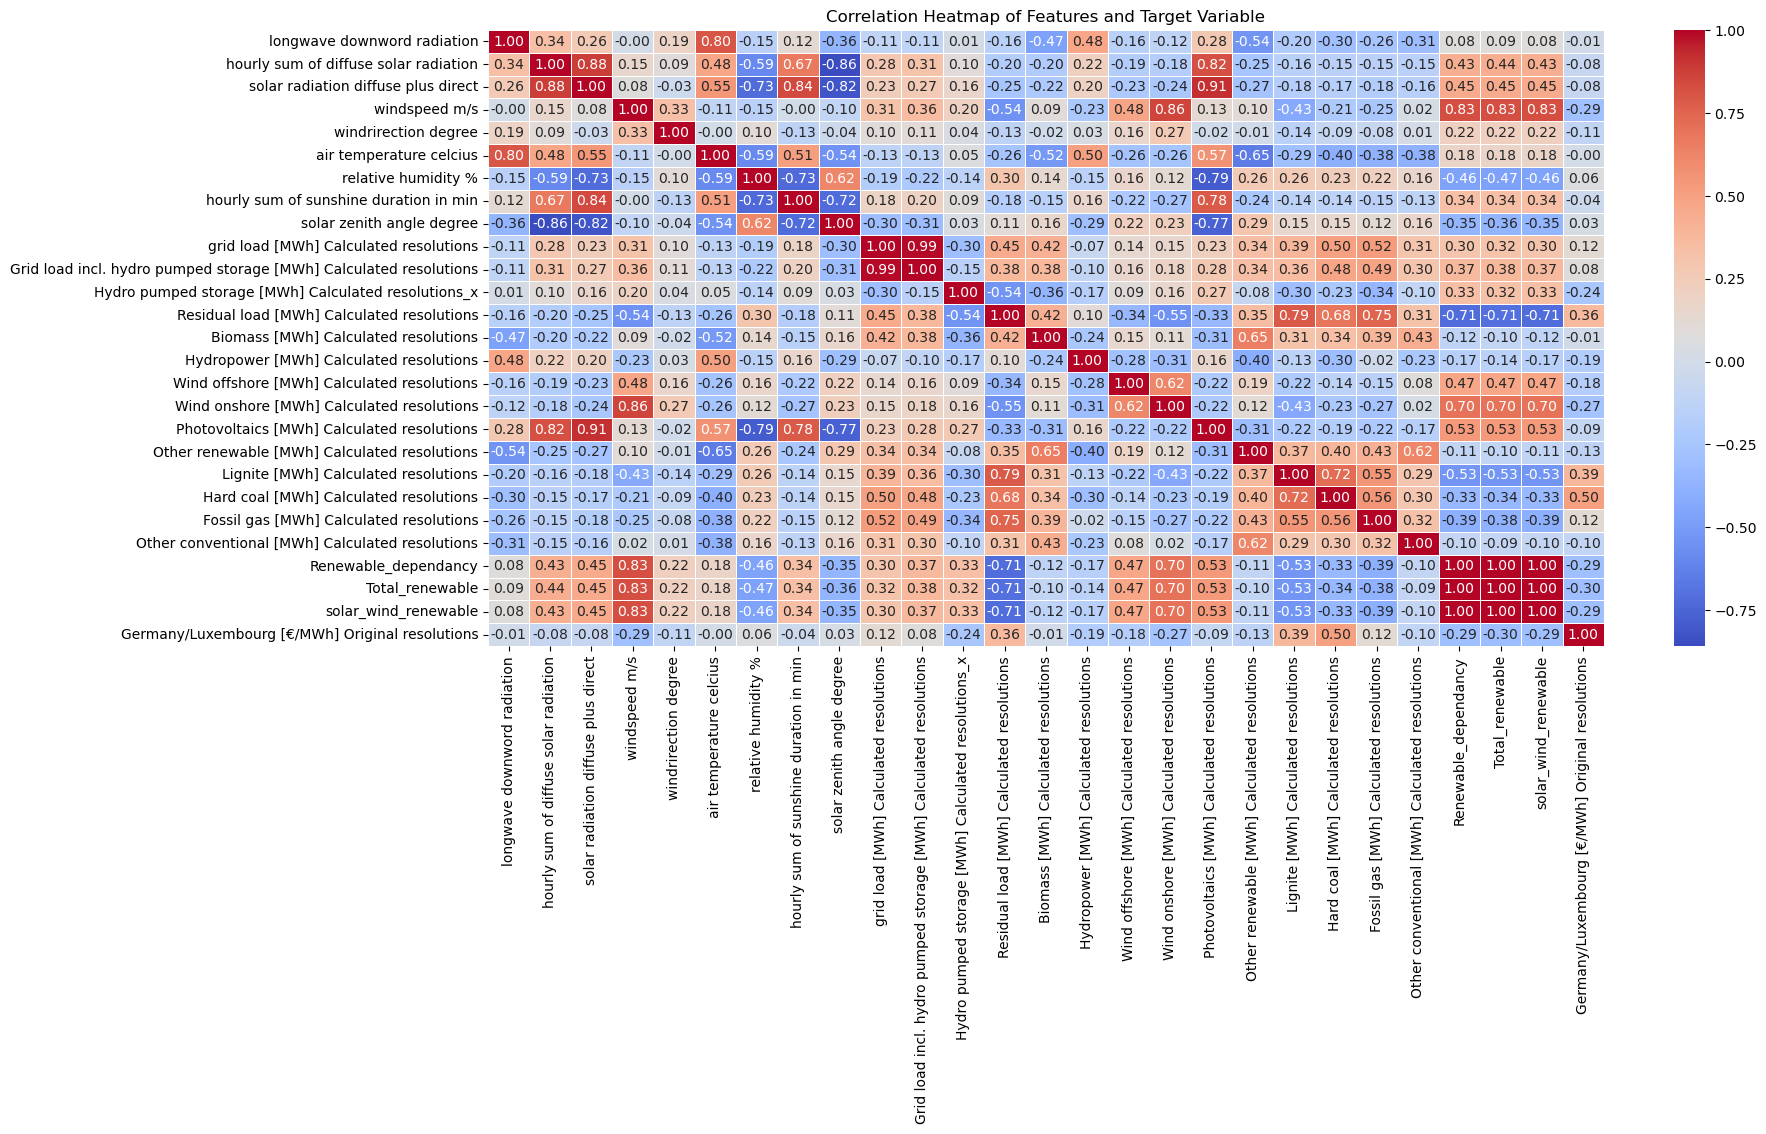

In [130]:
corr_df = energy[['longwave downword radiation',
       'hourly sum of diffuse solar radiation',
       'solar radiation diffuse plus direct', 'windspeed m/s',
       'windrirection degree', 'air temperature celcius',
       'relative humidity %', 'hourly sum of sunshine duration in min',
       'solar zenith angle degree', 'grid load [MWh] Calculated resolutions',
       'Grid load incl. hydro pumped storage [MWh] Calculated resolutions',
       'Hydro pumped storage [MWh] Calculated resolutions_x',
       'Residual load [MWh] Calculated resolutions',
       'Biomass [MWh] Calculated resolutions',
       'Hydropower [MWh] Calculated resolutions',
       'Wind offshore [MWh] Calculated resolutions',
       'Wind onshore [MWh] Calculated resolutions',
       'Photovoltaics [MWh] Calculated resolutions',
       'Other renewable [MWh] Calculated resolutions',
       'Lignite [MWh] Calculated resolutions',
       'Hard coal [MWh] Calculated resolutions',
       'Fossil gas [MWh] Calculated resolutions',
       'Other conventional [MWh] Calculated resolutions',
       'Renewable_dependancy', 'Total_renewable', 'solar_wind_renewable',
       'Germany/Luxembourg [€/MWh] Original resolutions']]


plt.figure(figsize=(18, 8))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Features and Target Variable")
plt.show()

# Model Training

In [109]:


# Save DataFrame to CSV
energy.to_csv("energy_data.csv", index=False)

print("CSV file saved successfully!")


CSV file saved successfully!


# 1. Linear Regression

Train Score (R²): 0.5041
Test Score (R²): 0.5165


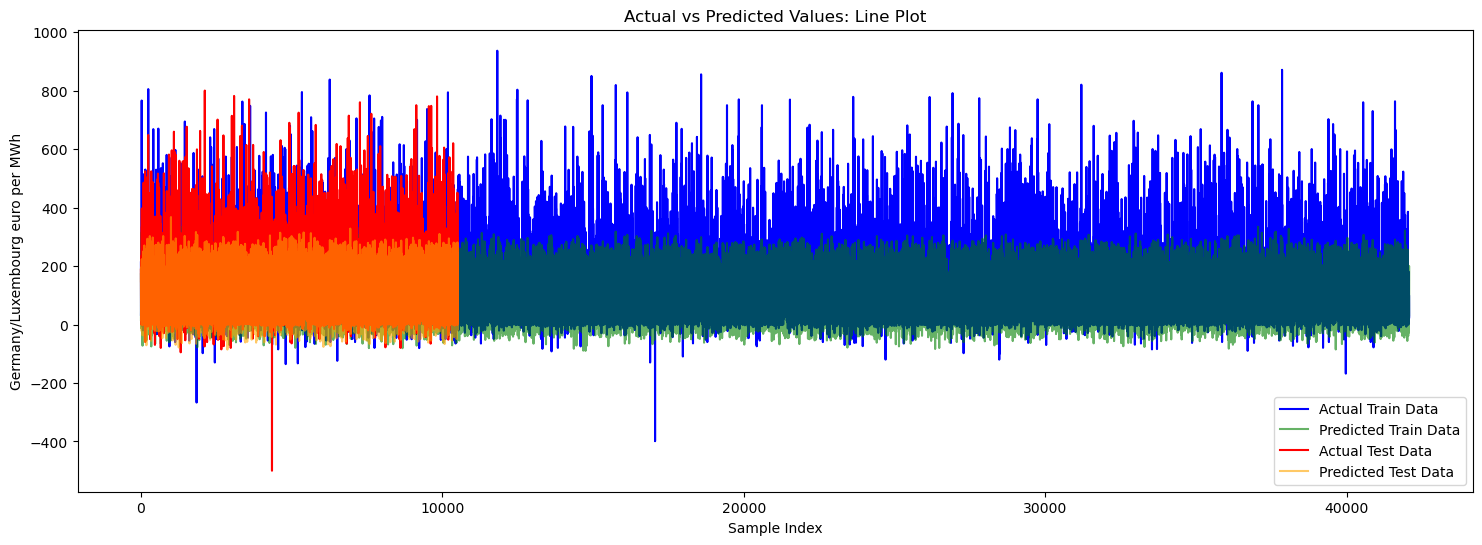

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error




# Define features (X) and target (y)
X = energy.drop(columns=[ 'Germany/Luxembourg [€/MWh] Original resolutions',"MESS_DATUM"])  # Features
y = energy[ 'Germany/Luxembourg [€/MWh] Original resolutions']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler AFTER train-test split
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform test data

# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Compute train and test scores (R²)
train_score = model.score(X_train_scaled, y_train)  # R² on training set
test_score = model.score(X_test_scaled, y_test)    # R² on test set

# Print the results
print(f"Train Score (R²): {train_score:.4f}")
print(f"Test Score (R²): {test_score:.4f}")

# Predictions for visualization
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Plot results
plt.figure(figsize=(18, 6))
plt.plot(range(len(y_train)), y_train, color="blue", label="Actual Train Data")
plt.plot(range(len(y_train)), y_pred_train, color="green", label="Predicted Train Data", alpha=0.6)
plt.plot(range(len(y_test)), y_test, color="red", label="Actual Test Data")
plt.plot(range(len(y_test)), y_pred_test, color="orange", label="Predicted Test Data", alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel("Germany/Luxembourg euro per MWh")
plt.legend()
plt.title("Actual vs Predicted Values: Line Plot")
plt.show()


# Lasso regression

Train Score (R²): 0.5023
Test Score (R²): 0.5145


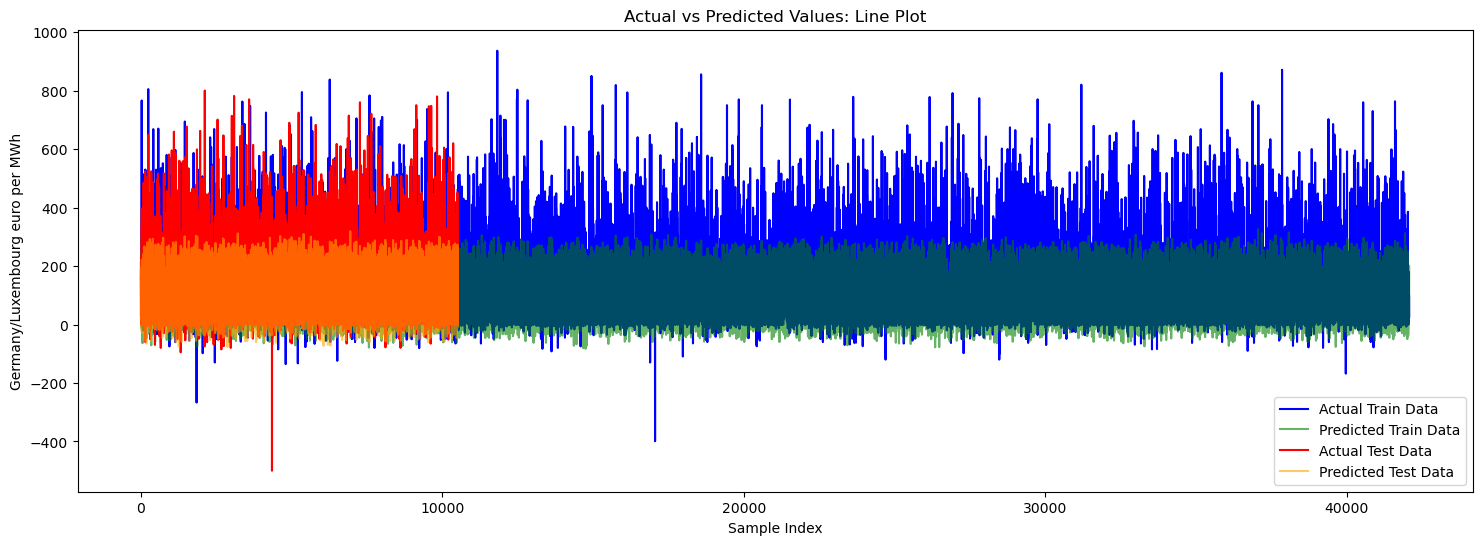

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score




# Define features (X) and target (y)
X = energy.drop(columns=[ 'Germany/Luxembourg [€/MWh] Original resolutions',"MESS_DATUM"])  # Features
y = energy[ 'Germany/Luxembourg [€/MWh] Original resolutions']  # Target variable


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler AFTER train-test split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform test data

# Create and train Lasso model (with alpha for regularization)
lasso = Lasso(alpha=0.5)  # You can tune alpha
lasso.fit(X_train_scaled, y_train)

# Compute train and test scores (R²)
train_score = lasso.score(X_train_scaled, y_train)  # R² on training set
test_score = lasso.score(X_test_scaled, y_test)    # R² on test set

# Print results
print(f"Train Score (R²): {train_score:.4f}")
print(f"Test Score (R²): {test_score:.4f}")

# Predictions
y_pred_train = lasso.predict(X_train_scaled)
y_pred_test = lasso.predict(X_test_scaled)

# Plot results
plt.figure(figsize=(18, 6))
plt.plot(range(len(y_train)), y_train, color="blue", label="Actual Train Data")
plt.plot(range(len(y_train)), y_pred_train, color="green", label="Predicted Train Data", alpha=0.6)
plt.plot(range(len(y_test)), y_test, color="red", label="Actual Test Data")
plt.plot(range(len(y_test)), y_pred_test, color="orange", label="Predicted Test Data", alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel("Germany/Luxembourg euro per MWh")
plt.legend()
plt.title("Actual vs Predicted Values: Line Plot")
plt.show()


# Ridge Regression

Train Score (R²): 0.5040
Test Score (R²): 0.5172


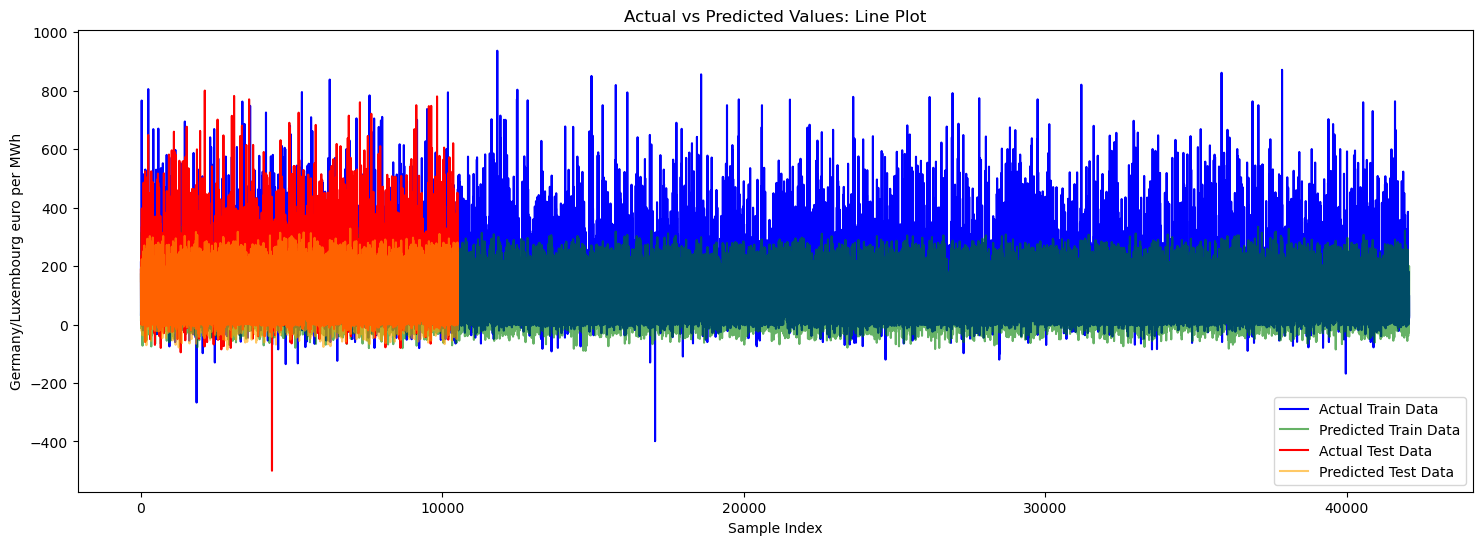

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Define features (X) and target (y)
X = energy.drop(columns=[ 'Germany/Luxembourg [€/MWh] Original resolutions',"MESS_DATUM"])  # Features
y = energy[ 'Germany/Luxembourg [€/MWh] Original resolutions']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply StandardScaler AFTER train-test split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform test data

# Create and train Ridge model (with alpha for regularization)
ridge = Ridge(alpha=0.5)  # You can tune alpha
ridge.fit(X_train_scaled, y_train)

# Compute train and test scores (R²)
train_score = ridge.score(X_train_scaled, y_train)  # R² on training set
test_score = ridge.score(X_test_scaled, y_test)    # R² on test set

# Print results
print(f"Train Score (R²): {train_score:.4f}")
print(f"Test Score (R²): {test_score:.4f}")

# Predictions
y_pred_train = ridge.predict(X_train_scaled)
y_pred_test = ridge.predict(X_test_scaled)

# Plot results
plt.figure(figsize=(18, 6))
plt.plot(range(len(y_train)), y_train, color="blue", label="Actual Train Data")
plt.plot(range(len(y_train)), y_pred_train, color="green", label="Predicted Train Data", alpha=0.6)
plt.plot(range(len(y_test)), y_test, color="red", label="Actual Test Data")
plt.plot(range(len(y_test)), y_pred_test, color="orange", label="Predicted Test Data", alpha=0.6)
plt.xlabel("Sample Index")
plt.ylabel("Germany/Luxembourg euro per MWh")
plt.legend()
plt.title("Actual vs Predicted Values: Line Plot")
plt.show()


#ANN model

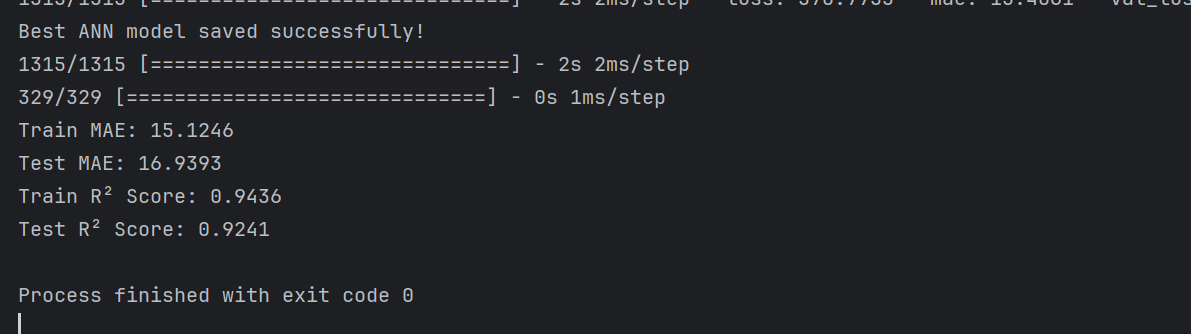

# Random Forest Regressor

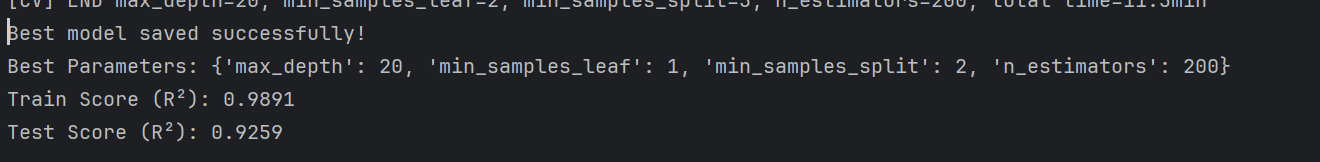